In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/FER2013/fer2013.csv')

In [ ]:
df = data
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
label = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4:'sadness', 5:'surprise', 6:'neutral'}

In [ ]:
emValues = df.emotion.values
emValues[:5]

array([0, 0, 2, 4, 6])

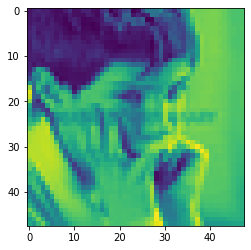

In [ ]:
plt.imshow(np.array(data.pixels.loc[3].split(' ')).reshape(48,48).astype(float))

In [ ]:
img_array = data.pixels.apply(lambda x : np.array(x.split(' ')).reshape(48,48,1).astype('float32'))

In [ ]:
img_array = np.stack(img_array, axis=0)

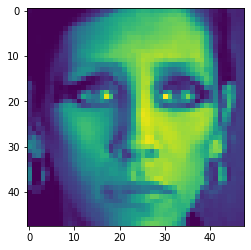

In [ ]:
plt.imshow(img_array[4].reshape(48,48))

In [ ]:
img_array.shape

(35887, 48, 48, 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(img_array,emValues,test_size=0.2)

In [ ]:
X_train=X_train/255
X_test = X_test/255

In [ ]:
X_train.shape , y_train , X_test.shape, y_test

((28709, 48, 48, 1),
 array([3, 5, 3, ..., 2, 4, 4]),
 (7178, 48, 48, 1),
 array([6, 0, 6, ..., 4, 3, 4]))

In [ ]:
import tensorflow as tf

base_model = tf.keras.models.Sequential(
                                 [     
                                     tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape = (48,48,1)),
                                     tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape = (48,48,64))
                                     tf.keras.layers.MaxPool2D(2,2),
                                     tf.keras.layers.BatchNormalization(),
                                        
                                     tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                     tf.keras.layers.BatchNormalization(),
                                        
                                                                
                                     tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
                                     tf.keras.layers.Dropout(.3),
                                     tf.keras.layers.MaxPool2D(2,2),
                                     tf.keras.layers.BatchNormalization(),

                                     tf.keras.layers.Flatten(),    
                                     tf.keras.layers.Dense(4096,activation='relu'),
                                     tf.keras.layers.Dense(7,activation = 'softmax')                
                                   ]
                              )

In [ ]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 512)         5

In [ ]:
base_model.compile( 
                  optimizer= 'adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
                )

In [ ]:
base_model.fit(X_train,y_train, epochs=15)

Epoch 1/15
898/898 [==============================] - 45s 15ms/step - loss: 2.0929 - accuracy: 0.4089
Epoch 2/15
898/898 [==============================] - 14s 15ms/step - loss: 1.2779 - accuracy: 0.5187
Epoch 3/15
898/898 [==============================] - 14s 15ms/step - loss: 1.1381 - accuracy: 0.5721
Epoch 4/15
898/898 [==============================] - 14s 15ms/step - loss: 1.0167 - accuracy: 0.6173
Epoch 5/15
898/898 [==============================] - 14s 15ms/step - loss: 0.8829 - accuracy: 0.6744
Epoch 6/15
898/898 [==============================] - 14s 15ms/step - loss: 0.7418 - accuracy: 0.7259
Epoch 7/15
898/898 [==============================] - 14s 15ms/step - loss: 0.5718 - accuracy: 0.7942
Epoch 8/15
898/898 [==============================] - 14s 15ms/step - loss: 0.4640 - accuracy: 0.8372
Epoch 9/15
898/898 [==============================] - 14s 15ms/step - loss: 0.3696 - accuracy: 0.8743
Epoch 10/15
898/898 [==============================] - 14s 15ms/step - loss: 0.307

In [ ]:
y_pred = base_model.predict(X_test)

In [ ]:
print(y_test[:5])
y_pred[:5]

[6 0 6 5 2]


array([[2.4404436e-02, 1.4527754e-03, 2.7182919e-01, 1.0424996e-01,
        2.2253542e-01, 3.8746845e-02, 3.3678135e-01],
       [8.4200281e-01, 1.3017993e-01, 1.8187319e-03, 1.1552711e-04,
        9.4748620e-04, 2.2347704e-02, 2.5877513e-03],
       [1.3190061e-01, 8.1130667e-05, 1.7574139e-02, 8.1935439e-05,
        1.7656863e-01, 2.3463662e-03, 6.7144722e-01],
       [6.2178230e-01, 4.9981959e-03, 3.0086496e-01, 2.0800637e-02,
        3.4011577e-03, 4.7105916e-02, 1.0468478e-03],
       [1.8810283e-02, 3.7566200e-03, 8.7380284e-01, 7.1819052e-03,
        3.1369664e-02, 5.4741763e-03, 5.9604499e-02]], dtype=float32)

In [ ]:
base_model.evaluate(X_test,y_test)

225/225 [==============================] - 1s 5ms/step - loss: 1.9279 - accuracy: 0.5536


[1.9278690814971924, 0.5536361336708069]

In [ ]:
y_predicted = [np.argmax(i) for i in y_pred]
y_predicted[:5]

[6, 0, 6, 0, 2]

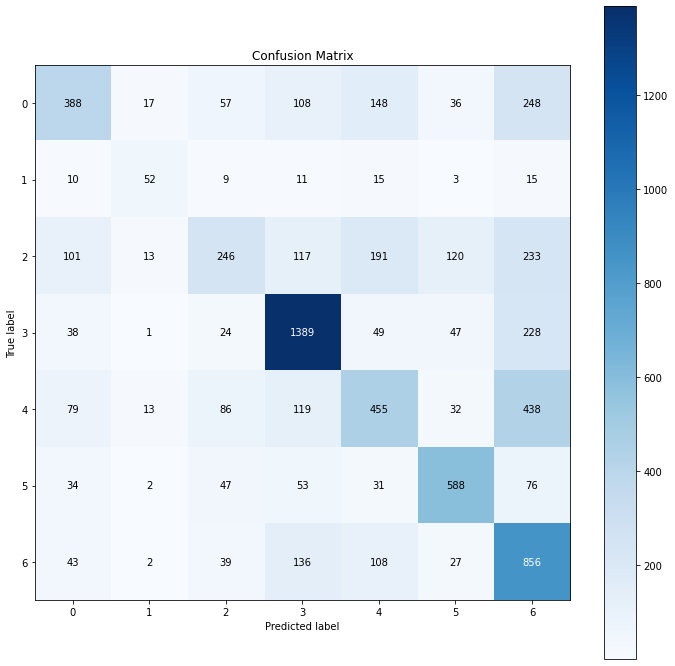

In [ ]:
! pip install -q scikit-plot
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_predicted,
    figsize=(12,12))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']
print(classification_report(y_test, y_predicted, target_names=target_names))

              precision    recall  f1-score   support

       anger       0.56      0.39      0.46      1002
     disgust       0.52      0.45      0.48       115
        fear       0.48      0.24      0.32      1021
   happiness       0.72      0.78      0.75      1776
     sadness       0.46      0.37      0.41      1222
    surprise       0.69      0.71      0.70       831
     neutral       0.41      0.71      0.52      1211

    accuracy                           0.55      7178
   macro avg       0.55      0.52      0.52      7178
weighted avg       0.56      0.55      0.54      7178

